# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<a name="000"> Оглавление </a>
 
1. [Обзор данных](#start)
<a id="Обзор данных"></a>   
 

2. [Предобработка данных](#preprocessing)
<a id="Предобработка данных"></a>

   * 2.1. [Обработка пропущенных значений](#null)
<a id="Обработка пропущенных значений"></a> 
   * 2.2. [Варианты написания](#writing)
<a id="Варианты написания"></a> 
   * 2.3. [Замена типа данных](#datatype)
<a id="Замена типа данных"></a>    
  * 2.4. [Обработка дубликатов](#duplicates)
<a id="Обработка дубликатов"></a>


3. [Добавление новых столбцов](#new_col)
<a id="Добавление новых столбцов"></a>


4. [Исследовательский анализ данных](#analysis)
<a id="Исследовательский анализ данных"></a> 
   * 4.1. [Площадь, цена, число комнат, высота потолков](#4.1)
<a id="Площадь, цена, число комнат, высота потолков "></a> 
   * 4.2. [Время продажи квартиры](#4.2)
<a id="Время продажи квартиры "></a>
   * 4.3. [Редкие значения и выбросы](#4.3)
<a id="Редкие значения и выбросы"></a>  
   * 4.4. [Зависимость цены](#4.4)
<a id="Зависимость цены"></a> 
   * 4.5. [10 населённых пунктов по объявлениям](#4.5)
<a id="10 населённых пунктов по объявлениям"></a>   
   * 4.6. [Расстояние до центра](#4.6)
<a id="Расстояние до центра"></a>  
   * 4.7. [Центр Петербурга](#4.7)
<a id="Центр Петербурга"></a>   


5. [Вывод](#5)
<a id="Вывод"></a>
<br> 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd     # импортировали библиотеку pandas
from IPython.display import display   # импортировалиа метод display из библиотеки IPython.display  
import warnings
warnings.filterwarnings('ignore')   # отключили предупреждения
from datetime import datetime  # для определения дня недели
import matplotlib.pyplot as plt   # для работы с графиками

import seaborn as sns
pd.set_option('display.max_columns', None) 

In [2]:
df=pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')    # прочитали файл, сохранили в df

In [3]:
def hesil(d, n):
    return pd.concat([d.head(n), d.sample(n, random_state=88), d.tail(n)], axis=0)
hesil(df, 5)

# вывели по 5 строк первых, последних, рандомных - некорректное отображение нужен разделитель - отредактировали чтение файла

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
15317,10,7500000.0,55.00,2018-06-07T00:00:00,2,3.20,5.0,34.0,5,NaN,False,False,8.00,NaN,Санкт-Петербург,27236.0,4579.0,1.0,596.0,1.0,482.0,NaN
5696,9,3480000.0,43.90,2018-01-20T00:00:00,2,NaN,5.0,27.9,4,NaN,False,False,5.00,NaN,Санкт-Петербург,7056.0,17233.0,1.0,658.0,0.0,NaN,3.0
12005,14,4999000.0,36.00,2018-03-06T00:00:00,1,2.55,12.0,NaN,9,False,False,False,9.00,NaN,Санкт-Петербург,12153.0,10623.0,0.0,NaN,0.0,NaN,219.0
8091,8,4450000.0,65.00,2017-07-21T00:00:00,3,2.55,9.0,43.0,1,False,False,False,9.85,NaN,Санкт-Петербург,27943.0,11396.0,1.0,41.0,0.0,NaN,491.0
16410,17,13500000.0,109.00,2017-09-26T00:00:00,3,2.80,13.0,50.0,2,NaN,False,False,20.00,1.0,Санкт-Петербург,29990.0,4870.0,1.0,641.0,1.0,145.0,364.0


In [4]:
df.info()   # просмотрели инфо

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
# ищем пропущенные значения и их долю
display(df.isnull().sum())
df.isna().mean()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

<a name="start">1. Обзор данных</a>

Правильно отобразили данные. Все названия столбцов в порядке, лишних столбцов нет. <br> Средние значения выглядят реалистичною. Из подозрительных значений: 5 балконов, 100 м потолок, 19 комнат, 60 этажей (наверно, просто шесть?). <br> Ну а самое важное и грустное - ОЧЕНЬ много NaN. 
<br>1. Больше 88% в <code>is_apartment</code>  - нужно поменять пропуски на False, тем самым сделать тип bool. Ведь большинство квартир - это НЕ апартаменты. Но тогда сколько останется непосредственно апартаментов? 
Еще есть два столбца bool - <code>studio, open_plan</code>.
<br>2. Около 50% <code>balcony</code> - поменяем пропуски на 0. Если не указано, значит, балкона нет.
<br>3. Одинаковая доля - 23% - у <code>airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000</code>. Почему одинаковая, не все данные загрузились из одного источника? Скорее всего, пропуски в этих столбцах совпадают.  оставим NaN у парков и прудов - ведь в вопросах исследования их нет. 
<br>4. Около 40% <code>ceiling_height</code> - наверное, заполним по среднему значению (с группировкой?). 
<br>5. 60-65% <code>parks_nearest, ponds_nearest</code> - не вижу адекватных вариантов заполнения. Оставим.
<br>6. 13% <code>days_exposition</code>  - гадать не можем, не заполнять пропуски.
<br>7. 8-9% <code>living_area, kitchen_area</code> - посмотрим по ходу исследования.
<br>8. 0,2-0,3% <code>floors_total, locality_name</code> - доля очень мала, можно и оставить NaN, и удалить.

<br><code>locality_name</code>- здесь нужно единство написания. Сразу видим, что есть "поселок" и "посёлок".
<br> У многих можно столбцов поменять c float на int: <code>last_price, balcony, floors_total, days_exposition, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest</code>.
<br>А <code>first_day_exposition</code> - на datetime
 
 

### Шаг 2. Предобработка данных

<a name="preprocessing">2. Предобработка данных</a> <br>
<a name="null">2.1. Обработка пропущенных значений</a> 

In [7]:
#df['ceiling_height'].value_counts()
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Просмотрев все значения высоты потолка, я предполагаю, что значение 26 - это опечатка, на самом деле 2.6 м, 32 - 3.2 м. Заменяем.


In [8]:
df.loc[df['ceiling_height'] > 10, 'ceiling_height'] = df['ceiling_height']/10 

In [9]:
df['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [10]:
df['ceiling_height'].median()   # высота потолков - заменим пропуски на медиану (мах 100) 
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())  

In [11]:
df.loc[df['balcony'].isna(), 'balcony'] = 0     # по балконам около половины значений заменили на 0
df.loc[(df['is_apartment'].isna()), 'is_apartment'] = False    # поменяли пропуски на False
display(df.head())     # проверка 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [12]:
df['is_apartment'].value_counts()   

False    23649
True        50
Name: is_apartment, dtype: int64

Получили только 50 штук апартаментов... Можно принять за правду, если предположить, что в те годы они только появлялись как класс и, следовательно, доля на рынке была настолько низкой.

<a writing="null">2.2. Варианты написания</a> 

In [13]:
df['locality_name'] = df['locality_name'].fillna('no_info')   # заменили пропуски, хотя их всего 49

In [14]:
len(df['locality_name'].value_counts())

365

Cмотрим сколько всего населенных пунктов и вариантов их написания: поселок и посёлок, городской поселок и поселок городского типа, деревня Кудрово и Кудрово, три варианта Мурино. Названия написаны корректно с большой буквы.

In [15]:
display(df['locality_name'].unique()) 

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [16]:
df['locality_name'] = df['locality_name'].str.replace('посёлок','поселок')
df['locality_name'] = df['locality_name'].str.replace('городской поселок','поселок городского типа')
df['locality_name'] = df['locality_name'].str.replace('поселок Мурино','Мурино')
df['locality_name'] = df['locality_name'].str.replace('деревня Кудрово','Кудрово')

# привели к единообразию


In [17]:
#display(df['locality_name'].unique())   # проверка
len(df['locality_name'].value_counts())    # проверка

322

<a name="datatype">2.3. Замена типа данных</a>

In [18]:
df['balcony'] = df['balcony'].astype(int)   # сделаем целым числом цену и балконы
df['last_price'] = (df['last_price']/1000).astype(int)     # уберем три нолика у цены, чтобы не мешали визуально

df.dropna(subset = ['floors_total'], inplace = True)    # удалила малую долю пропусков, потому что не применялся int (?)
df['floors_total'] = df['floors_total'].astype('int')
df.head()
 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900,159.0,2015-07-24T00:00:00,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<a name="duplicates">2.4. Обработка дубликатов</a>

In [19]:
display(df.duplicated().sum())  # дублей нет

0

### Шаг 3. Посчитайте и добавьте в таблицу

<a name="new_col">3. Добавление новых столбцов</a>

In [20]:
df['price_metr'] = (df['last_price'] / df['total_area']).round(2)   # цена квадратного метра, округлим до сотых 

In [21]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# изменили формат на datetime
 

In [22]:
# добавили день недели, месяц и год публикации объявления
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year 


In [23]:
#  этаж квартиры; варианты категорий — первый, последний, другой

def floor_gr(floor):
    floors_total = floor['floors_total']
    floor = floor['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
df['floors_group'] = df.apply(floor_gr, axis=1) 
# df[['floor', 'floors_total', 'floors_category']].head()    # проверка

In [24]:
# соотношение жилой и общей площади, а также отношение площади кухни к общей - округлим до сотых
df['living_part'] = (df['living_area'] / df['total_area']).round(2)
df['kitchen_part'] = (df['kitchen_area'] / df['total_area']).round(2)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday,month,year,floors_group,living_part,kitchen_part
0,20,13000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.37,3,3,2019,другой,0.47,0.23
1,7,3350,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82.92,1,12,2018,первый,0.46,0.27
2,10,5196,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.79,3,8,2015,другой,0.61,0.15
3,0,64900,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.18,4,7,2015,другой,NaN,NaN
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.00,1,6,2018,другой,0.32,0.41


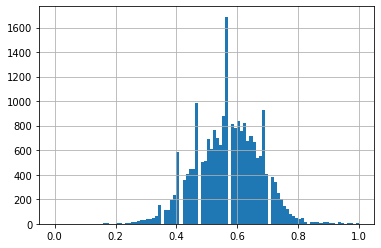

In [25]:
df['living_part'].hist(bins=100, range=(0, 1))    # посмотрим долю жилой площади от общей  
plt.show()

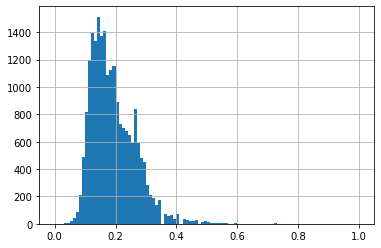

In [26]:
df['kitchen_part'].hist(bins=100, range=(0, 1))

 Добавили нужные столбцы, один из самых важных параметров - цена за метр. <br> Жилая площадь в среднем занимает примерно 55% от общей, кухни - 11-25% 

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

<a name="analysis"> 4. Исследовательский анализ данных </a> <br>
<a name="4.1"> 4.1. Площадь, цена, число комнат, высота потолков </a>

In [27]:
df_new = df[['total_area', 'last_price', 'rooms', 'ceiling_height']]     # создаем новую рабочую таблицу
df_new.describe()

,total_area,last_price,rooms,ceiling_height
count,23613.000000,23613.000000,23613.000000,23613.000000
mean,60.340678,6540.539999,2.071147,2.697923
std,35.648988,10901.717848,1.078380,0.238047
min,12.000000,12.000000,0.000000,1.000000
25%,40.000000,3400.000000,1.000000,2.600000
50%,52.000000,4650.000000,2.000000,2.650000
75%,69.800000,6799.000000,3.000000,2.700000
max,900.000000,763000.000000,19.000000,10.000000


Средние значения и квантили выглядят правдоподобно. Выбросы - 900 м, 764 млн, 19 комнат, 100 м потолки - похоже на мини-дворец в Геленджике. Также есть потолок 1 метр и 0 комнат.

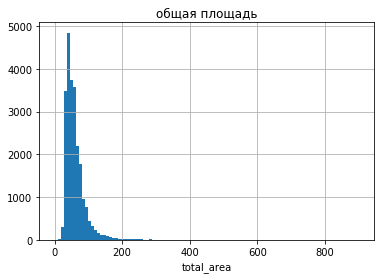

In [28]:
plt.title('общая площадь')
plt.xlabel('total_area')
df['total_area'].hist(bins=100, range=(0,900), grid=True)
plt.show()



Площадь. Всё предсказуемо: видим пик на 50-60 м и падение в ноль после 200, выброс макс 900.

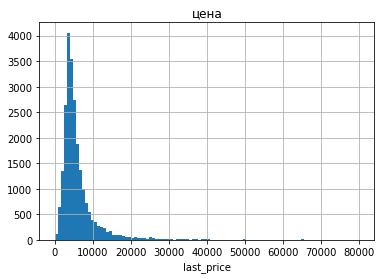

In [29]:
plt.title('цена')
plt.xlabel('last_price')

df['last_price'].hist(bins=100, range=(0,80000), grid=True)
plt.show()

Пик около отметки 4 млн. После 20 млн мало значений. Выброс очень далеко

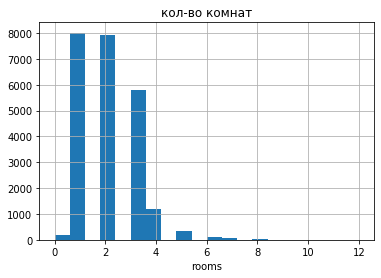

In [30]:
plt.title('кол-во комнат')
plt.xlabel('rooms')

df['rooms'].hist(bins=20, range=(0,12), grid=True)
plt.show()

Число комнат. Пик на 1-2 комнатах, чуть меньше значений у 3 комнат. Больше 6 - значений мало. Есть нули.

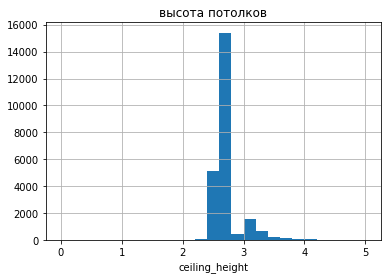

In [31]:
plt.title('высота потолков')
plt.xlabel('ceiling_height')

df['ceiling_height'].hist(bins=25, range=(0,5), grid=True)
plt.show()

Высота потолков. Пик на 2,6-2,7 м. После 4 м мало значений. Выброс 1 и 100.

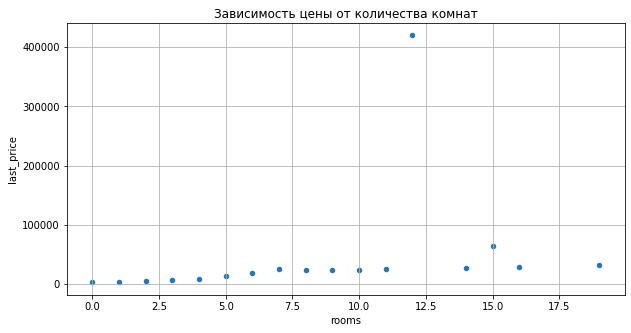

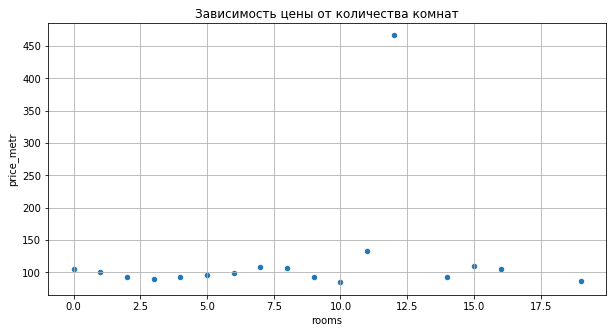

In [32]:
# Словарь можно объявить вне функции, 
# так как его значения могут еще понадобиться в других частях кода, не связанных с функцией.
# В цикле, например. Или в функцию ты подставишь значения из другого словаря. От last_price тоже лучше уйти.
# Можно тогда посмотреть цену за кв. м. или сравнить другие показатели.

title_dict = {'total_area': 'Зависимость цены от площади', 'ceiling_height': 'Зависимость цены от высота потолка',
                  'rooms': 'Зависимость цены от количества комнат',
                  'price_metr': 'Зависимость цены от цены за кв м'}


def histo(df, column_1, column_2):
    
    df_histo = df.groupby(column_1).median()\
    [column_2].reset_index()
    
    df_histo.plot(x=column_1, y= column_2,
                  kind='scatter', legend=False, figsize=(10,5), grid=True)
    # Форматировать график лучше отдельно.
    
    plt.title(title_dict[column_1])
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    
    plt.show()
        
histo(df, 'rooms', 'last_price') 
histo(df, 'rooms', 'price_metr') 

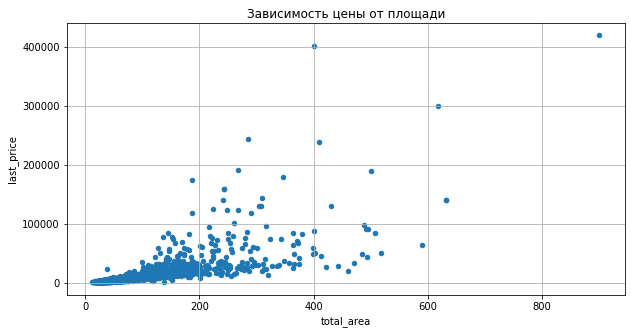

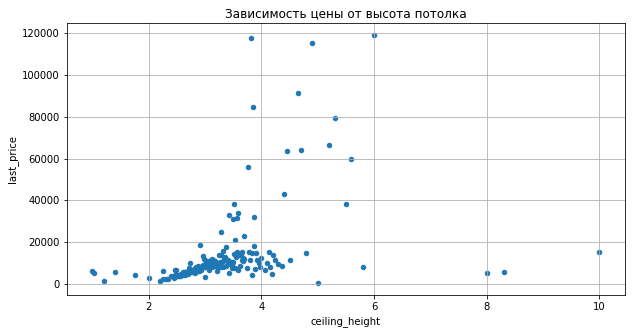

In [33]:
histo(df, 'total_area', 'last_price')
histo(df, 'ceiling_height', 'last_price')

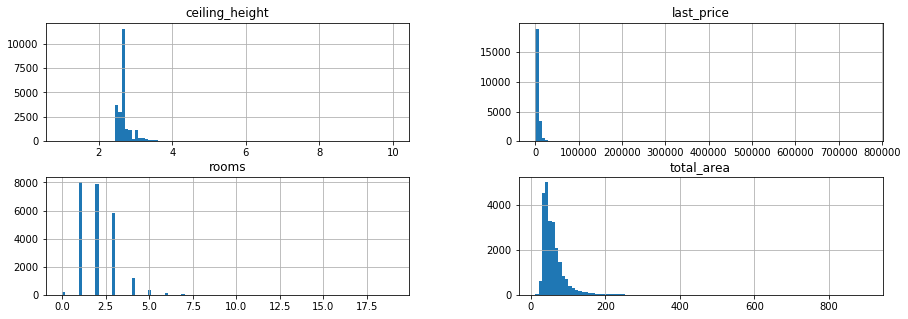

In [34]:
# Тогда вот так лучше. В цикле повторила 4 раза одно и то же.

df_new.hist(bins=100, figsize=(15, 5), grid=True)
plt.show()

# Либо

#print(100*'=')
#for columns in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
#    df_new[columns].hist(bins=100, figsize=(12, 5), grid=True)
#    plt.title(columns)
#    plt.show()

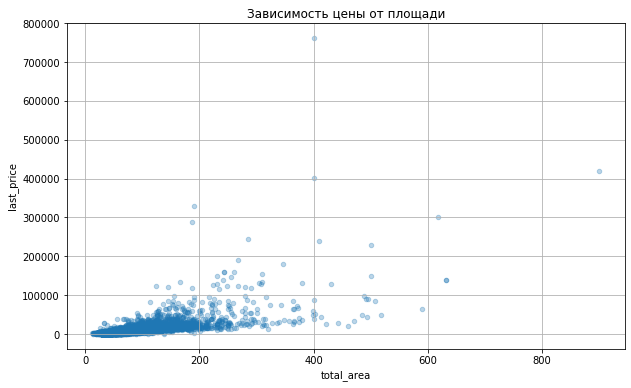

In [35]:
# посмотрим зависимость цены от площади и частотность

df.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha=0.3, figsize=(10,6)) 

plt.title('Зависимость цены от площади')
plt.show()

Хорошо видны отдельные единичные точки - выбросы. Большинство квартир - до 200 м и 5-6 млн. Естественно, с увеличением площади увеличивается цена.  

### Выводы о типичной квартире на продаже:
- Метраж квартир 30-70 кв.м. Пик - 50-60 кв.м
- Цена от 2-3 до 10-12 млн. Пик около 4 млн.
- Количество комнат в квартирах 1-2. Реже встречаются трёшки.
- Высота потолка 2.6-2.7 м.

<br>

<a name="4.2"> 4.2. Время продажи квартиры</a>

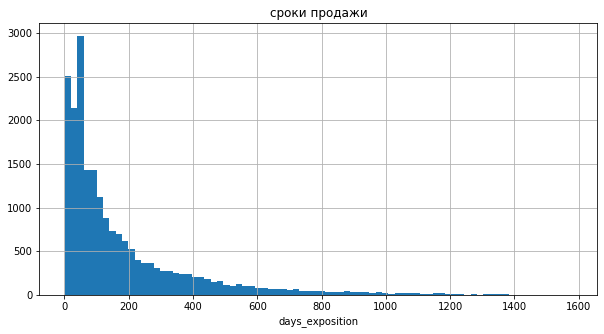

In [36]:
plt.title('сроки продажи')
plt.xlabel('days_exposition') 
df['days_exposition'].hist(bins=80, figsize=(10,5))   # гистограмма сроков продажи
plt.show()

In [37]:
df['days_exposition'].value_counts() 

45.0      880
60.0      538
7.0       234
30.0      208
90.0      201
         ... 
1355.0      1
873.0       1
730.0       1
976.0       1
773.0       1
Name: days_exposition, Length: 1139, dtype: int64

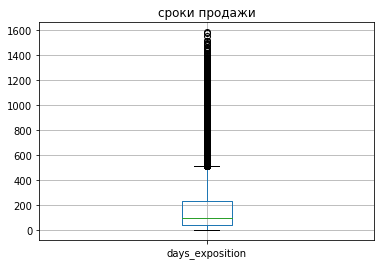

In [38]:
df.boxplot(column='days_exposition')
plt.title('сроки продажи')
plt.show()

Видно, что обычно квартиры продаются не более чем за 90-100 дней. Долгой может считаться продажа, которая длится более 9-10 месяцев. Также видно, что большая доля квартир продается в первые 2 месяца.
Среднее время - 180 дней, медианное в два раза меньше - 95. После медианы спад, продаются дольше 100 дней. Значит, есть несколько очень больших значений, влияющих на среднее - это не закрытые объявления.
Ограничить можно 450-500 днями.  


<a name="4.3"> 4.3. Редкие значения и выбросы</a>

Определим границы значений в нашем исследовании на основе предыдущих пунктов.   
- площадь total_area - 20-200 м  
- цена last_price - 500 тыс - 20 млн
- комнаты rooms - от 1 до 6
- высота потолка ceiling_height - от 2 до 4 м

In [39]:
df_good = df.query(
    ('20 <= total_area <= 200') and ('500000 <= last_price <= 20000000') 
    and ('rooms <= 6') and ('2 <= ceiling_height <= 4')
)

#len(df_good)   # 23557
#len(df)  # 23613  проверка

<a name="4.4"> 4.4. Зависимость цены</a>
от площади, числа комнат, удалённости от центра, этажа и даты размещения.


In [40]:
df_corr1 = df_good[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]    # создали новый дф для графтка
display(df_corr1.corr())     # нашли коэффициенты корреляции

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.646694,0.358791,-0.204485
total_area,0.646694,1.000000,0.761322,-0.229876
rooms,0.358791,0.761322,1.000000,-0.183294
cityCenters_nearest,-0.204485,-0.229876,-0.183294,1.000000


Видим линейную зависимость коэффициент больше 0,6: 
- Конечно же, чем больше площадь квартиры, тем выше её цена.
- Чем больше комнат, тем больше площадь. Но комнаты бывают разных размеров. 

Влияние количества комнат на цену минимально. <br>Отрицательная корреляция говорит нам об уменьшении одной величины при увеличении другой. В нашем случае при коэффициенте около -0,2 связь между величинами слабая: при уменьшении расстояния к центру увеличивается цена. Также может быть, что чем ближе к центру, тем больше комнат (площадь). 

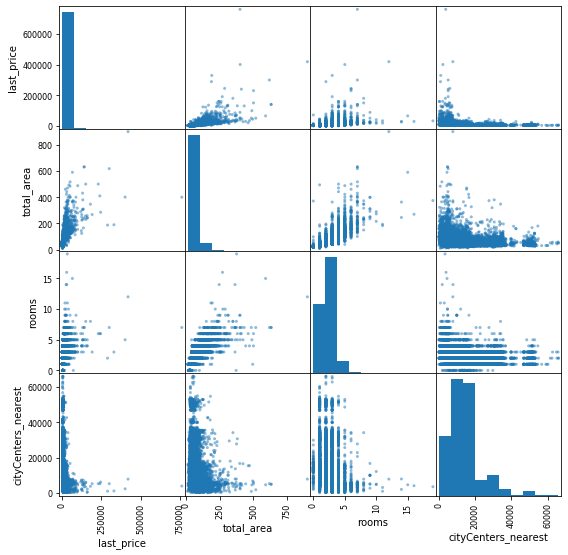

In [41]:
pd.plotting.scatter_matrix(df_corr1, figsize=(9, 9))   
plt.show()

Чем больше комнат, тем выше цена - с 1 до 5 комнат, с 6-7 идет понижение. Возможно, это коммуналки. <br>
С увеличением расстояния до центра города уменьшается стоимость квартир, что вполне предсказуемо.<br>
<br>
На графике видно, что, например, двухкомнатная квартира может быть и 50 м, и 100 м. <br>
Чем дальше от центра, тем меньше площадь (вот она, отрицательная корреляция).


In [42]:
df_corr2 = df_good.groupby('floors_group')['last_price'].agg(['count','mean','median']) 

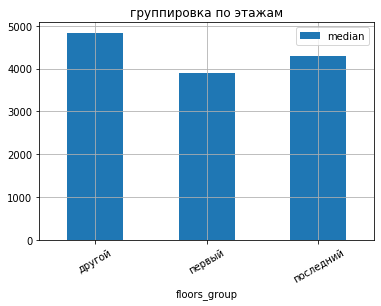

In [43]:
df_corr2.plot(y='median', kind='bar', grid=True)
plt.title('группировка по этажам') 
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()

In [44]:
df_good.groupby('floors_group')['last_price'].agg(['count','mean','median'])

,count,mean,median
floors_group,,,
другой,17336,6653.908514,4836.5
первый,2909,4803.599862,3900.0
последний,3312,7121.821256,4300.0


In [45]:
df_good.groupby('floors_group')['price_metr'].agg(['count','mean','median'])

,count,mean,median
floors_group,,,
другой,17336,103.372349,98.250
первый,2909,81.998140,81.220
последний,3312,92.607382,87.585


Довольно ожидаемо, что первые (медиана не доходит до 4 млн) и последние этажи (4,3 млн) дешевле других (4,8 млн).  Также интересно посмотреть этот критерий по стоимости за квадратный метр. Цена квадрата квартир на первых этажах около 81 тыс, что почти на 20% ниже цены на "других" этажах - 98 тыс. Последние этажи котируются лучше, чем первые - 87 тыс.

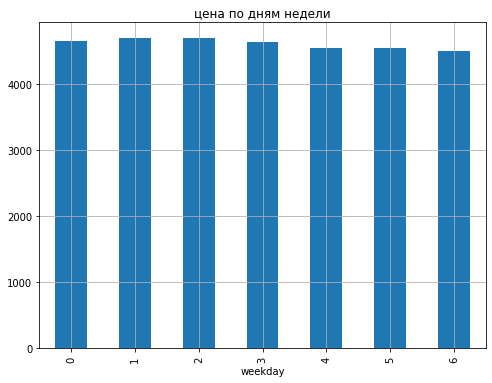

In [46]:
data_weekday = df_good.pivot_table(index='weekday', values ='last_price', aggfunc='median')
data_weekday.plot(y='last_price', kind ='bar', grid=True, figsize=(8,6), legend=False)
# display(data_weekday)
plt.title('цена по дням недели')
plt.show()

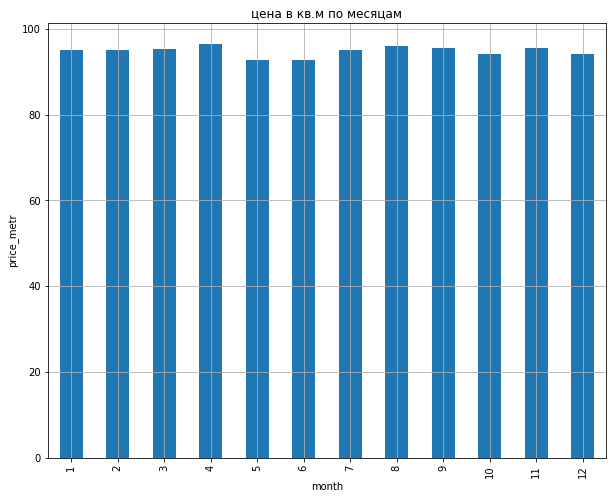

In [47]:
data_month = df_good.pivot_table(index='month', values ='price_metr', aggfunc='median')  # посмотрим за кв.метр
data_month.plot(y='price_metr', kind ='bar', grid=True, figsize=(10,8), legend=False)
plt.title('цена в кв.м по месяцам')
plt.xlabel('month')
plt.ylabel('price_metr')
plt.show()    
#display(data_month)


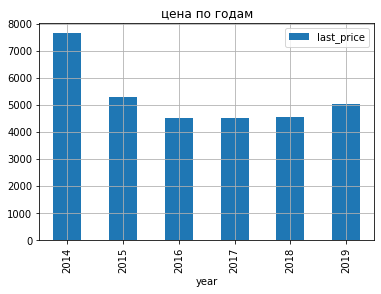

In [48]:
data_year = df_good.pivot_table(index='year', values ='last_price', aggfunc='median')  # посмотрели last_price
data_year.plot(y='last_price', kind ='bar', grid=True) 
plt.title('цена по годам')
plt.show()    
#display(data_year)

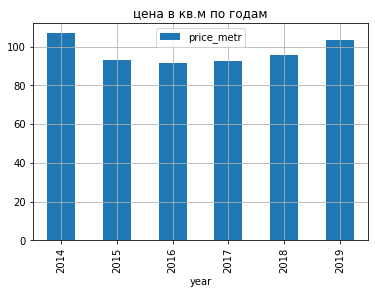

,price_metr
year,
2014,106.90
2015,93.33
2016,91.77
2017,92.50
2018,95.65
2019,103.23


In [49]:
data_year = df_good.pivot_table(index='year', values ='price_metr', aggfunc='median')  # посмотрим за кв.метр price_metr
data_year.plot(y='price_metr', kind ='bar', grid=True)  
plt.title('цена в кв.м по годам')
plt.show() 
display(data_year)

Используем функцию...  Вроде получилось! 

In [50]:
title_dict = {'weekday': 'цена в кв.м по дням недели', 'month': 'цена в кв.м по месяцам',
                  'year': 'цена в кв.м по годам'}

def fundate(df, column_1, column_2):
    
    df_fundate = df.groupby(column_1).median()\
    [column_2].reset_index()
    df_fundate.plot(x=column_1, y= column_2,
                  kind='bar', legend=False, grid=True) 
    
    plt.title(title_dict[column_1])
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    
    plt.show()

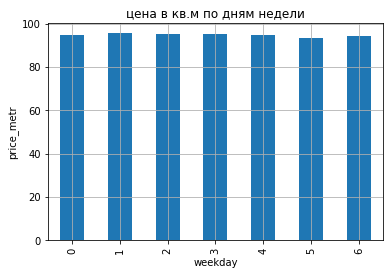

In [51]:
fundate (df, 'weekday', 'price_metr')

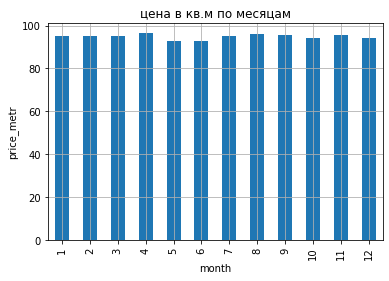

In [52]:
fundate (df, 'month', 'price_metr')

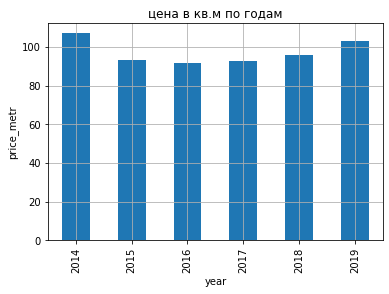

In [53]:
fundate (df, 'year', 'price_metr')

Зависимость цены от дня недели публикации объявления минимальна. На графике видно, что в рабочие дни (пн-чт) публикуются объявления с чуть более высокой стоимостью.<br>
Зависимость цены от месяца уже более очевидна: стоимость квадрата в мае и июне минимальна (92.6 тыс.). Апрель, август и ноябрь предлагают квадрат выше чем за 95.6 тыс.
Зависимость цены от месяца: график с полной стоимостью меня насторожил из-за пика в 2014, что не может быть правдой - скорее всего, там не хватает чего-то. По графику с ценой за квадрат видно, что 2015-2017 гг примерно на одном уровне. И с 16-го года квадратный метр растет и в 19-ом составляет 103 тыс.

<a name="4.5"> 4.5. 10 населённых пунктов по объявлениям </a>

In [54]:
df_good['locality_name'].value_counts().head(10)   # 10 населённых пунктов с наибольшим числом объявлений

Санкт-Петербург      15603
Мурино                 586
Кудрово                470
поселок Шушары         439
Всеволожск             397
Пушкин                 368
Колпино                338
поселок Парголово      327
Гатчина                307
Выборг                 236
Name: locality_name, dtype: int64

In [55]:
df_top10 = df_good.groupby('locality_name').agg(
    {'locality_name':'count','price_metr':'mean', 'last_price':['max','min']}
)
df_top10 = df_top10.sort_values(by = ('locality_name', 'count'), ascending = False)
#display(df_top10.head(10))   

In [56]:
display(df_top10.head(10).sort_values(by = ('price_metr','mean'), ascending = False))
# вывели среднюю цену квадратного метра в этих населённых пунктах

locality_name  price_metr last_price      
                          count        mean        max   min
locality_name                                               
Санкт-Петербург           15603  114.632265     763000    12
Пушкин                      368  103.058234      42000  1990
Кудрово                     470   95.260426      13000  1800
поселок Парголово           327   90.176116       9140  1400
Мурино                      586   86.040648       8500  1730
поселок Шушары              439   78.551526      10990  1500
Колпино                     338   75.424290      36900  2100
Гатчина                     307   68.746287      13900   850
Всеволожск                  397   68.604912      24412   965
Выборг                      236   58.093941      19990   600

Лидеры по цене за квадрат - Петербург и Пушкин - здесь она превышает 100 тыс. С удалением от города падает цена. Выборг предлагает квартиры по стоимости в 2 раза меньше, чем Петербург.
Наибольшее число объявлений тоже логично: Мурино и Кудрово лидируют по количеству сданных метров.

<a name="4.6"> 4.6. Расстояние до центра</a>

In [57]:
df_spb = df_good.query('locality_name == "Санкт-Петербург"')    # выделили квартиры в СПб
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday,month,year,floors_group,living_part,kitchen_part
0,20,13000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.37,3,3,2019,другой,0.47,0.23
2,10,5196,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.79,3,8,2015,другой,0.61,0.15
3,0,64900,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.18,4,7,2015,другой,NaN,NaN
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.00,1,6,2018,другой,0.32,0.41
7,5,7915,71.6,2019-04-18,2,2.65,24,NaN,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110.54,3,4,2019,другой,NaN,0.26


In [58]:
df_spb['cityCenters_km'] = round(df_spb['cityCenters_nearest']/1000)
# расстояние перевели в километры, округлили до целых
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday,month,year,floors_group,living_part,kitchen_part,cityCenters_km
0,20,13000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.37,3,3,2019,другой,0.47,0.23,16.0
2,10,5196,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.79,3,8,2015,другой,0.61,0.15,14.0
3,0,64900,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.18,4,7,2015,другой,NaN,NaN,7.0
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.00,1,6,2018,другой,0.32,0.41,8.0
7,5,7915,71.6,2019-04-18,2,2.65,24,NaN,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110.54,3,4,2019,другой,NaN,0.26,12.0


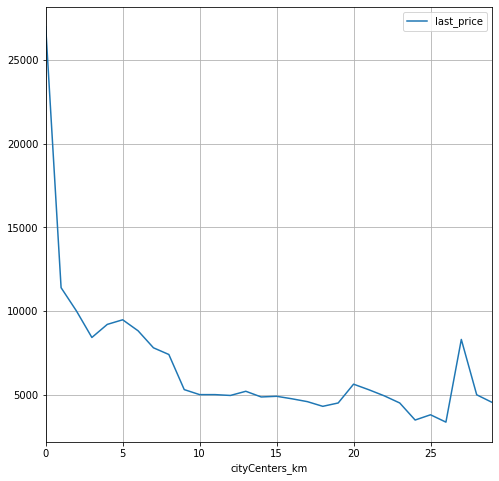

In [59]:
(df_spb
     .pivot_table(index='cityCenters_km', values='last_price', aggfunc='median')
     .plot(grid=True, figsize=(8, 8))
) 
plt.show() 
# посчитали медианы цен для каждого километра

На графике явно видно, что цена падает с удалением от центра. <br>Граница, где график сильно меняется — центральная зона - это **7 км.**


<a name="4.7"> 4.7. Центр Петербурга </a>

<font size="2">[к оглавлению](#000)</font>

In [60]:
center_spb = df_spb.query('cityCenters_km < 7')
# ограничу область 7 километрами

,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.595837,0.295969,0.098383
total_area,0.595837,1.000000,0.740843,0.226061
rooms,0.295969,0.740843,1.000000,0.223730
ceiling_height,0.098383,0.226061,0.223730,1.000000


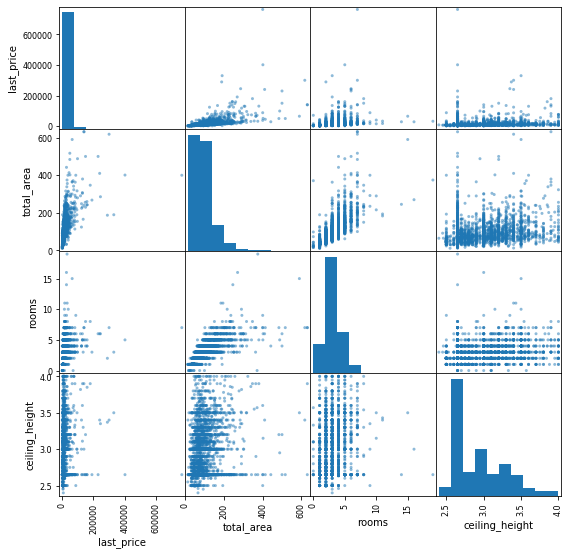

In [61]:
center_7 = center_spb[['last_price', 'total_area', 'rooms', 'ceiling_height']] 
# строим диаграмму рассеяния

display(center_7.corr())  # коэффициент больше 0,7 у площадь-комната
pd.plotting.scatter_matrix(center_7 , figsize=(9, 9))
plt.show() 

Цена растет с увеличением площади 0,59; площади от количества комнат 0,74 . Но двух- и семикомнатные квартиры могут быть по одинаковой цене. Не вижу сильной зависимости цены от высоты потолков 0,09.
Высота потолков, конечно, никак не связана с количеством комнат и площадью.
Конечно же, количество комнат может влиять на увеличение площади. А может и нет. 
Вот, например, квартиры-студии могут быть и 20 м, и 40 м.

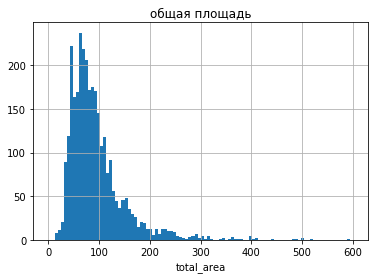

In [62]:
plt.title('общая площадь')
plt.xlabel('total_area')
center_7['total_area'].hist(bins=100, range=(0,600), grid=True)
plt.show() 

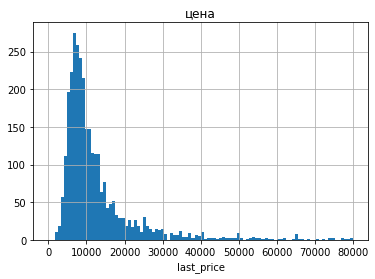

In [63]:
plt.title('цена')
plt.xlabel('last_price')
center_7['last_price'].hist(bins=100, range=(0,80000), grid=True)
plt.show() 

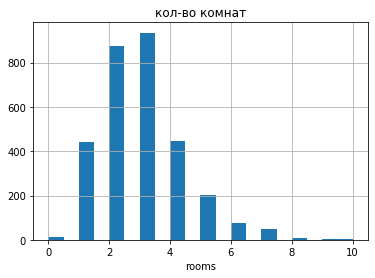

In [64]:
plt.title('кол-во комнат')
plt.xlabel('rooms')
center_7['rooms'].hist(bins=20, range=(0,10), grid=True)
plt.show() 

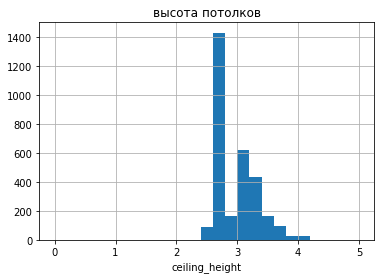

In [65]:
plt.title('высота потолков')
plt.xlabel('ceiling_height')
center_7['ceiling_height'].hist(bins=25, range=(0,5), grid=True)
plt.show() 

зона 7 км <br>
Площадь . Метраж в основном 40-150 м. Пик 60-70 м, много вариантов 90-100 м. Встречаются 150-250 м. <br>
Цена: большинство квартир от 2-3 до 20-25 млн. Пики 7-8-9 млн. После 40 млн мало значений.  <br>
Число комнат. Чаще встречаются двух- и трёхкомнатные квартиры. Примерно на 50% меньше - квартир с 4 комнатами, на 80% - 5 комнатных. <br>
Высота потолков. Пик 2.7 м, второй пик - на 55% меньше квартир с 3-3,3 м.


In [66]:
title_dict = {'total_area': 'общая площадь', 'ceiling_height': 'высота потолков',
                  'rooms': 'кол-во комнат',
                  'last_price': 'цена'}

def center_7_histo(df, column_1):
        
    df[column_1].hist(bins=100, figsize=(10,5), grid=True)
   
    plt.title(title_dict[column_1])
    plt.xlabel(column_1) 
    plt.show()

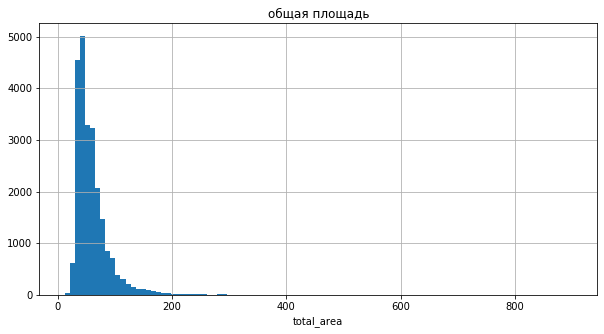

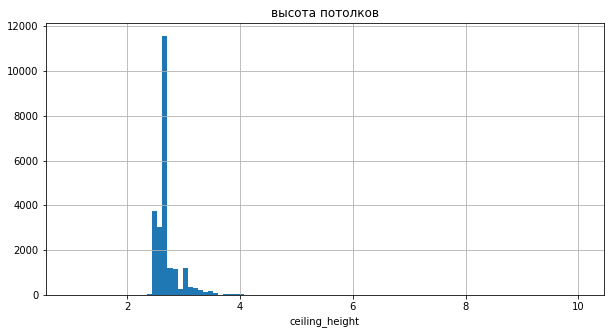

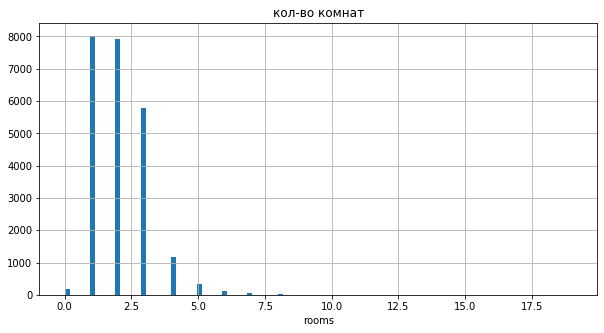

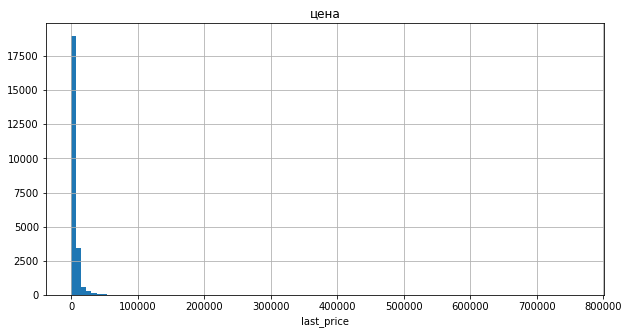

In [67]:
# Так короче.

for column_1 in title_dict:
    center_7_histo(df, column_1)

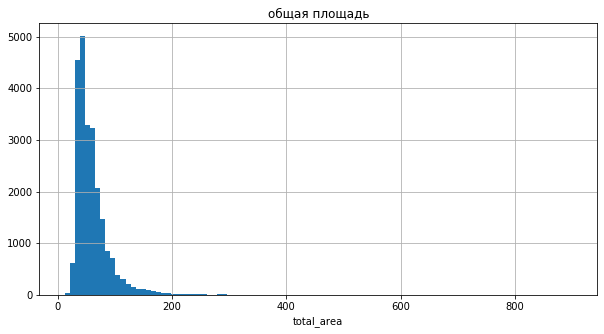

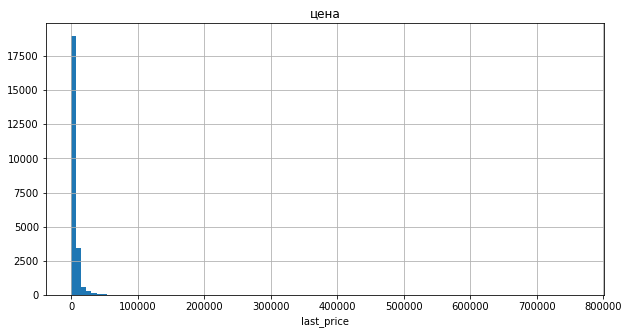

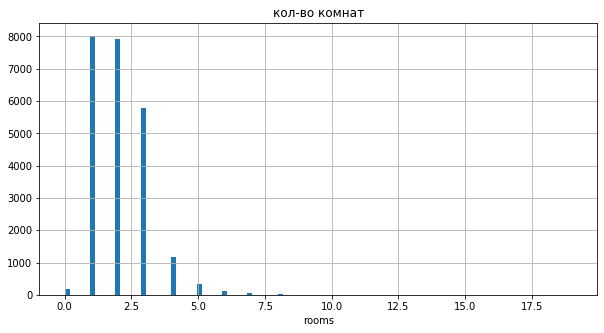

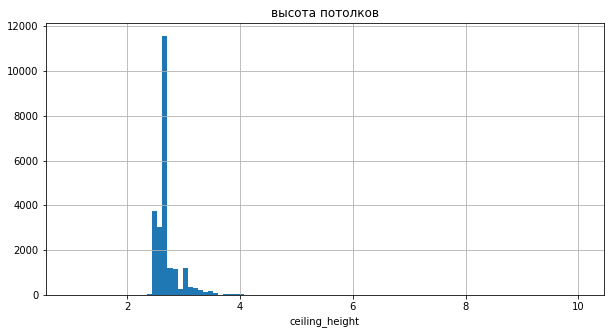

In [68]:
center_7_histo(df, 'total_area')
center_7_histo(df, 'last_price')
center_7_histo(df, 'rooms')
center_7_histo(df, 'ceiling_height')

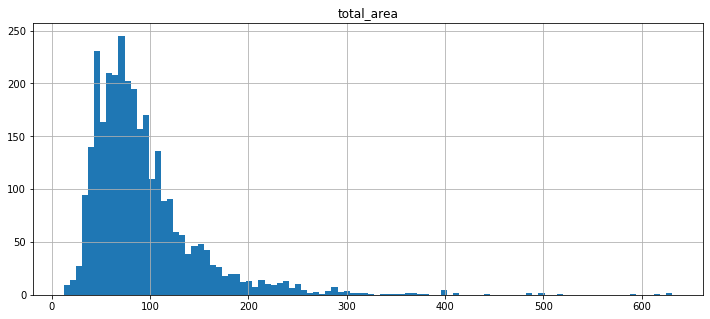

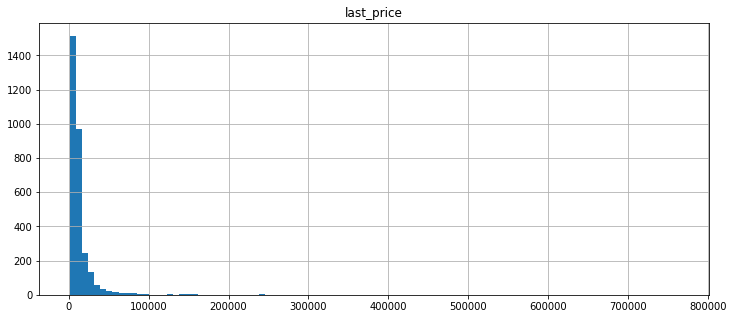

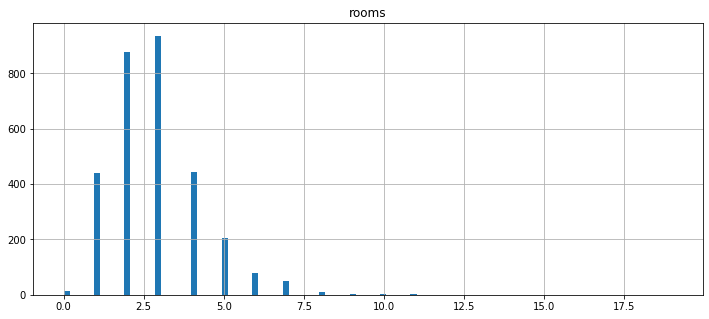

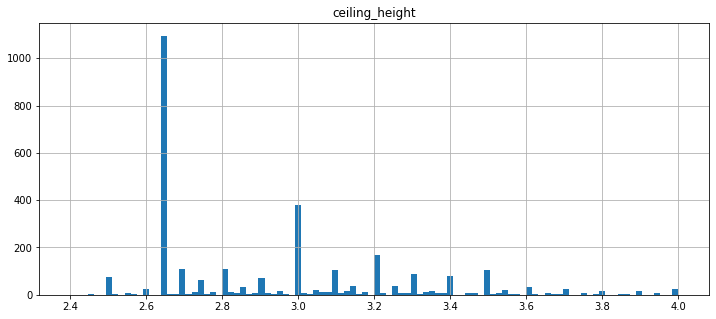

In [69]:
for columns in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    center_7[columns].hist(bins=100, figsize=(12, 5), grid=True)
    plt.title(columns)
    plt.show()

---
    рассмотрим зону периферии в 7-17 км 

In [70]:
spb_17 = df_spb.query('7 < cityCenters_km < 17')
center_17 = spb_17[['last_price', 'total_area', 'rooms', 'ceiling_height']] 


,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.765967,0.428706,0.275336
total_area,0.765967,1.000000,0.745841,0.314546
rooms,0.428706,0.745841,1.000000,0.101364
ceiling_height,0.275336,0.314546,0.101364,1.000000


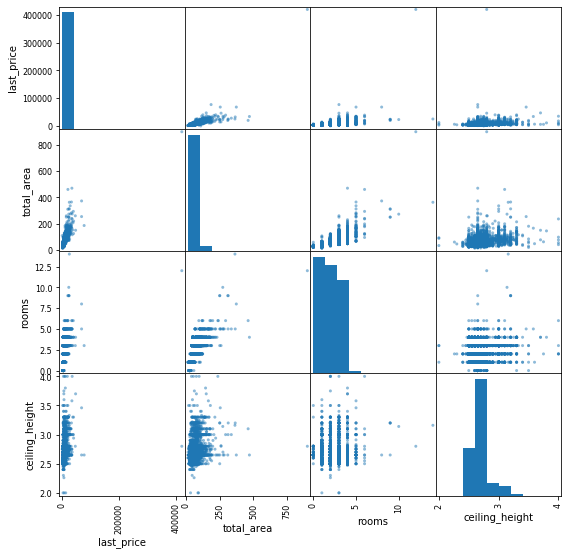

In [71]:
display(center_17.corr())  
# коэффициент 0,76 у площадь-комната; 0,65 - площажь-цена
pd.plotting.scatter_matrix(center_17 , figsize=(9, 9))
plt.show() 

В диапазоне от 7 до 17 км видна более сильная зависимость 
- цены от площади 0,76; 
- цены от количества комнат 0,42; 
- цены от высоты потолоков 0,27.
Коэффициент зависимости площади от количества комнат почти на том же уровне 0,76. <br>

Получается, что чем дальше дом от центра, тем более выраженная связь между ценой и другими критериями.

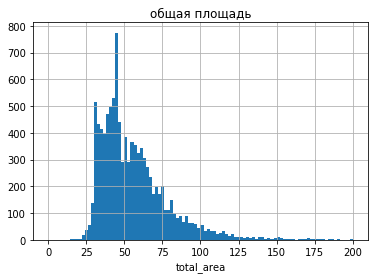

In [72]:
plt.title('общая площадь')
plt.xlabel('total_area') 
center_17['total_area'].hist(bins=100, range=(0,200), grid=True)
plt.show() 

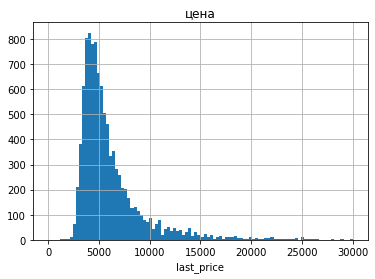

In [73]:
plt.title('цена')
plt.xlabel('last_price') 
center_17['last_price'].hist(bins=100, range=(0,30000), grid=True)
plt.show() 

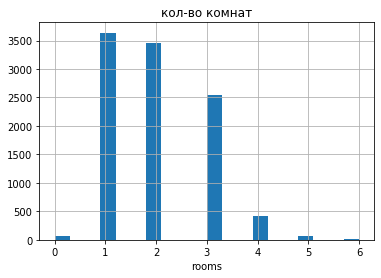

In [74]:
plt.title('кол-во комнат')
plt.xlabel('rooms') 
center_17['rooms'].hist(bins=20, range=(0,6), grid=True)
plt.show() 

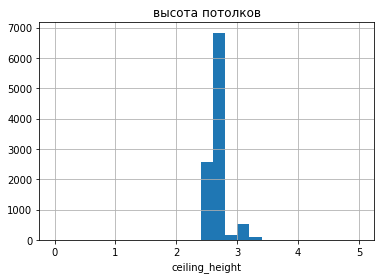

In [75]:
plt.title('высота потолков')
plt.xlabel('ceiling_height') 
center_17['ceiling_height'].hist(bins=25, range=(0,5), grid=True)
plt.show()

зона 7-17 км <br>

Площадь. Большая часть квартир от 25 до 125 м. Один большой пик 45 м. Незначительное количество более 100 м. <br>
Цена: от 2,5 до 11 млн. Свыше 15 млн - редкие экземпляры. <br>
Комнаты. Чаще встречаются однокомнатные (куда входят студии) и двухкомнатные. На 30% меньше трёшек. <br>
Потолки. Большинство квартир с потолками 2,6-2,7 м. Очень мало вариантов выше 3 м.

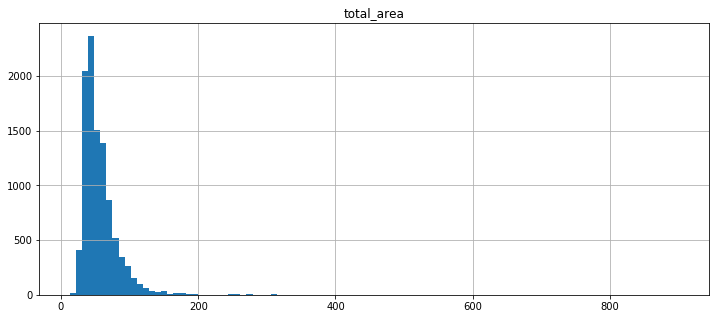

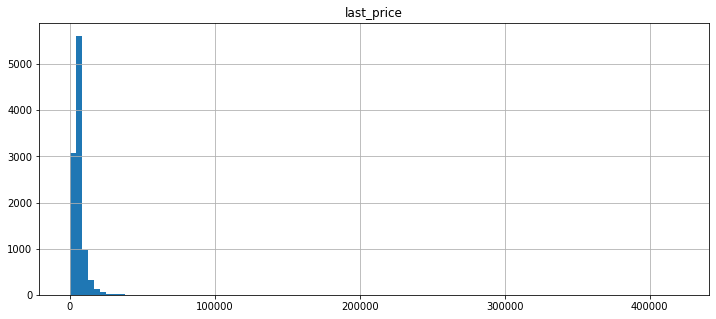

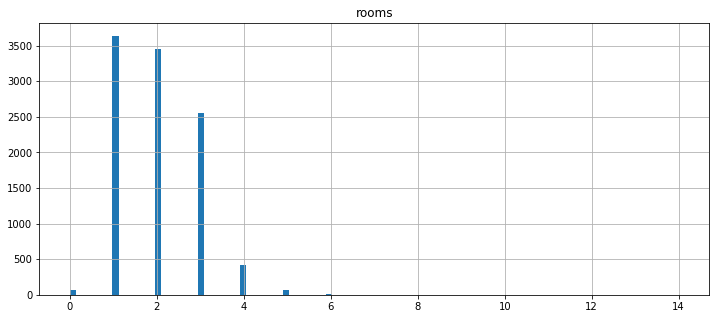

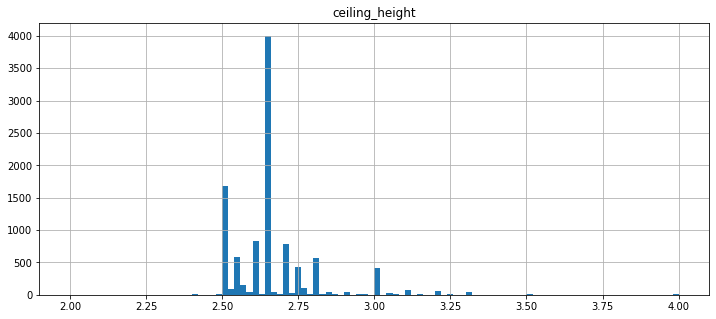

In [76]:
for columns in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    center_17[columns].hist(bins=100, figsize=(12, 5), grid=True)
    plt.title(columns)
    plt.show()

### Шаг 5. Общий вывод

<a name="5"> 5. Вывод </a>

<font size="2">[к оглавлению](#000)</font>

На этапах обзора и предобработки данных мы столкнулись с большим количеством пропущенных значений и заполнили их исходя из логических заключений: балконы есть или нет, апартаменты или нет. Заменили очень высокие потолки на невысокие. Далее обработали названия населенных пунктов, приведя их к единому написанию. Не обнаружили дубликатов и поменяли типы данных.
На основе вышеперечисленного определили границы значений в нашем исследовании:

- площадь total_area - 20-200 м
- цена last_price - 500 тыс - 20 млн
- комнаты rooms - от 1 до 6
- высота потолка ceiling_height - от 2 до 4 м

Проанализировали данные и сделали вывод, что цена квартиры сильнее всего зависит от общей площади квартиры и количества комнат. Высота потолков не играет сильной роли. <br> Обычно квартиры продаются за три месяца, причем многие находят новых владельцев за месяц. <br> Цена квадрата на первых этажах на 20% ниже цены на остальных этажах. Последние этажи  немного дороже, чем первые. <br> В будние дни размещаются объявления с чуть более высокой стоимостью квартир, чем на выходных. Зависимость цены от месяца размещения прослеживается лучше: стоимость квадрата в мае и июне минимальна, в апреле, августе и ноябре максимальна. <br> С увеличением расстояния до центра города уменьшается стоимость квартир. <br> Лидеры по цене за квадрат - Петербург и Пушкин, наибольшее предложение сосредоточено в самом СПб и ближайших пригородах. <br> Стоиость жилой недвижимости с каждым годом увеличивается.

Типичная квартира на продаже: 
- 50-60 кв.м
- около 4 млн
- 1-2 комнаты
- потолок 2.65 м

Типичная квартира в центральной зоне 7 км: 
- 70-100 кв.м
- около 10 млн
- 2-3 комнаты
- потолки 2.7, 3.2 м

Типичная квартира в зоне 7-17 км:
- 40-50 м
- около 4 млн
- 1-2 комнаты
- потолок 2.65 м